In [69]:
import pandas as pd

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = 'https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true'
dados = pd.read_csv(uri)

dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [70]:
colunas_de_notas = [
                    'NU_NOTA_CN',
                    'NU_NOTA_CH',
                    'NU_NOTA_LC',
                    'NU_NOTA_MT',
                    'NU_NOTA_REDACAO'
]

dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = [
                       'ciencias_naturais',
                       'ciencias_humanas',
                       'linguagem_codigo',
                       'matematica',
                       'redacao'
]

dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [71]:
# Variáveis para utilização no Machine Learning

x = dados_notas[[
                 'ciencias_naturais',
                 'ciencias_humanas',
                 'matematica',
                 'redacao'
]]

x.head()

,ciencias_naturais,ciencias_humanas,matematica,redacao
1,523.10,671.30,738.00,680.00
2,409.20,531.70,438.10,600.00
3,452.30,505.50,544.90,400.00
6,428.50,505.20,436.80,560.00
8,491.80,575.70,487.60,660.00


In [72]:
y = dados_notas['linguagem_codigo']
y.head()

1   661.60
2   389.00
3   448.50
6   521.00
8   524.40
Name: linguagem_codigo, dtype: float64

In [73]:
# Geração das variáveis de treino e teste para treinar a máquina

from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(43267)

# x é o valor que eu tenho e y é o valor que desejo adivinhar

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


## Desafio 1 da [Allan Spadini](https://twitter.com/allanspadini)

Explore os parâmetros C e o max_iter do modelo LinesSVR. Não há garantias que o resultado será melhor.

Padrão, ou seja com C e max_iter não alterados:

In [74]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [75]:
predicoes_nota_linguagem = modelo.predict(x_teste)
predicoes_nota_linguagem[:5]

array([591.30581763, 606.46025242, 639.89298788, 555.97651583,
       472.52000416])

In [76]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

Com max_iter = 2000

In [77]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(max_iter=2000)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=2000,
          random_state=None, tol=0.0001, verbose=0)

In [78]:
predicoes_nota_linguagem = modelo.predict(x_teste)
predicoes_nota_linguagem[:5]

array([612.88597197, 631.27276186, 655.36291987, 564.61439831,
       503.00573514])

In [79]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

Com C = 0.5

In [80]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(C=0.5)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=0.5, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [81]:
predicoes_nota_linguagem = modelo.predict(x_teste)
predicoes_nota_linguagem[:5]

array([463.39675405, 488.35477629, 506.54013097, 425.81934719,
       372.46650711])

In [82]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

Com C = 0.1

In [83]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(C=0.1)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [84]:
predicoes_nota_linguagem = modelo.predict(x_teste)
predicoes_nota_linguagem[:5]

array([535.55650043, 544.35920462, 566.00977952, 487.50687035,
       422.43807294])

In [85]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

Com C = 2.0

In [86]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(C = 2.0)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=2.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [87]:
predicoes_nota_linguagem = modelo.predict(x_teste)
predicoes_nota_linguagem[:5]

array([540.10235918, 558.75680573, 581.82485605, 496.90771797,
       435.06063909])

In [88]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

A partir dos dados que analisei, o modo padrão foi o mais preciso entre os testes

## Desafio 2 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Use a média das notas das 4 provas como input do input e plote um gráfico com a previsão e valores reais (Igual ao gráfico sugerido pelo Allan em aula)

In [89]:
x.mean(axis=1)

1        653.10
2        494.75
3        475.67
6        482.62
8        553.77
          ...  
137835   537.95
137836   513.65
137838   623.35
137840   468.25
137842   463.35
Length: 97270, dtype: float64

In [90]:
y

1        661.60
2        389.00
3        448.50
6        521.00
8        524.40
          ...  
137835   504.80
137836   528.50
137838   538.30
137840   468.10
137842   527.70
Name: linguagem_codigo, Length: 97270, dtype: float64

In [91]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x.mean(axis=1), y, random_state = 326784)

# O uso do reshape se faz necessário porque o método fit() exige arrays
# bidimensionais. reshape(-1, 1) é recomendação do sklearn
x_treino = x_treino.to_numpy().reshape(-1, 1)
x_teste = x_teste.to_numpy().reshape(-1, 1)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 1)
(24318, 1)
(72952,)
(24318,)


In [92]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [93]:
predicoes_nota_linguagem = modelo.predict(x_teste)
predicoes_nota_linguagem[:5]

array([647.42361256, 664.28624843, 682.42119795, 603.23311304,
       564.56194598])

In [94]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

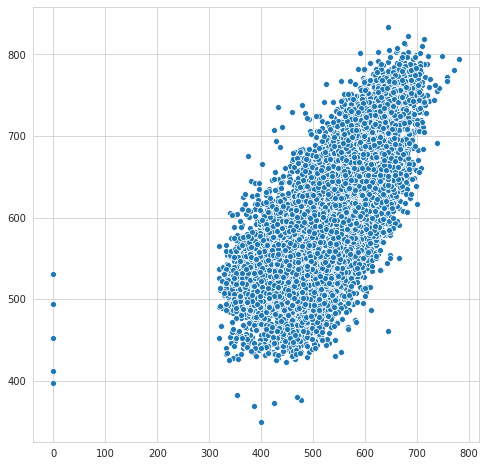

In [95]:
import seaborn as sns
#import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(8, 8))

sns.scatterplot(
    x = y_teste.values,
    y = predicoes_nota_linguagem
)

plt.show()

Usar as notas individuais é mais preciso do que usar a média das notas.

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)


Remover as notas zero e testar os mesmos modelos, comparando o resultado

In [96]:
notas_sem_0 = dados_notas[(dados_notas != 0).all(1)]
notas_sem_0.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [0]:
x = notas_sem_0[[
                 'ciencias_naturais',
                 'ciencias_humanas',
                 'matematica',
                 'redacao'
]]

y = notas_sem_0['linguagem_codigo']

In [98]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(71385, 4)
(23796, 4)
(71385,)
(23796,)


In [99]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [100]:
predicoes_nota_linguagem = modelo.predict(x_teste)
predicoes_nota_linguagem[:5]

array([579.86097927, 664.37745565, 502.97305041, 609.6782058 ,
       522.1780975 ])

In [101]:
y_teste[:5]

67400    601.20
103275   694.10
110888   504.40
38756    609.20
108828   455.80
Name: linguagem_codigo, dtype: float64

A precisão nessa amostra sem os valores 0 foi consideravelmente menor

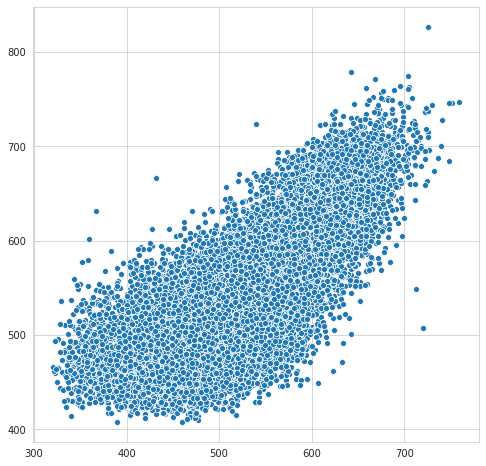

In [102]:
import seaborn as sns

plt.figure(figsize=(8, 8))

sns.scatterplot(
    x = y_teste.values,
    y = predicoes_nota_linguagem
)

plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Interpretar tudo que foi feito e compartilhar suas conclusões

É importante reparar na importância que determinados dados representam durante a análise e também na previsão dos dados. A retirada dos valores NaN e 0s alterou consideravelmente o resultado final das predições. Apesar de nos desafios eu ter usado somente o LinearSVR, existem outros métodos de regressão (cada um com seu objetivo e precisão em determinada circunstância) que também nos auxiliam como cientistas de dados à encontrar as previsões mais precisas possíveis.

Apesar do algoritmo não ser perfeito, o Machine Learning nos permite alcançar precisões maiores do que conseguiríamos com um cálculo de média por exemplo.

_OBS: As conclusões estão disponíveis também para cada exercício_

## Desafio 5 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Calcule as métricas de erro que utilizamos (mean square root error) também no conjunto de treino, e veja o que acontece comparado com o conjunto de teste.

In [0]:
x = dados_notas[[
                 'ciencias_naturais',
                 'ciencias_humanas',
                 'matematica',
                 'redacao'
]]

y = dados_notas['linguagem_codigo']

In [105]:
from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 326784)

print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [106]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [107]:
predicoes_nota_linguagem = modelo.predict(x_teste)
predicoes_nota_linguagem[:5]

array([646.86930127, 667.38985833, 711.08575141, 618.6670342 ,
       511.0504314 ])

In [109]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

In [117]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, predicoes_nota_linguagem)

5571.68

In [118]:
from sklearn.svm import LinearSVR

modelo = LinearSVR()
modelo.fit(x_teste, y_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [119]:
predicoes_nota_linguagem = modelo.predict(x_treino)
predicoes_nota_linguagem[:5]

array([666.58967631, 628.63838916, 496.77135128, 487.03998172,
       867.97868901])

In [120]:
y_treino[:5]

25012   608.10
52044   622.00
86543   476.40
36362   531.60
96734   725.90
Name: linguagem_codigo, dtype: float64

In [122]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_treino, predicoes_nota_linguagem)

2725.59

Quanto menor for o mean_squared_error() mais precisa é a previsão de valores. O que me chamou a atenção foi a inversão dos valores de treino e teste ter reduzido a taxa de erro consideravelmente.

Tenho 2 teorias para o que pode ter causado essa diferença. 

Uma é que, no último caso, estamos prevendo um número muito maior de notas, então o computador tem mais "espaço" para errar sem prejudicar muito o resultado. 

Outra possibilidade é que, no primeiro caso, dando mais valores para a máquina ela pode ter "decorado" os valores fornecidos, ou seja, se acostumou com os valores que se repetiam muitas vezes de forma que se tornou prejudicial na previsão. Em outras palavras, a máquina não teria guardado tendências, mas sim os valores. Quando era apresentado com um valor muito diferente do esperado, a previsão foi muito mais imprecisa.